In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#!pip install pycaret
from pycaret.classification import *
#from pycaret.regression import *

# Importing the data - only use *.MLReady.csv files!!!

In [5]:
df=pd.read_csv("../../data/epoch2MLclean.csv")
df.head()

,origIntRate,origUPB,origLTV,origDebtIncRatio,worstCreditScore,bankNumber,stateNumber,zeroBalCode,fmacRateAvg,fredRate,origYear,origMonth
0,5.125,348000,87,50,689,80,49,1,5.13,2.87,2009,2
1,4.625,195000,52,54,703,4,32,0,5.13,2.87,2009,2
2,4.875,342000,80,54,746,3,50,0,5.13,2.87,2009,2
3,5.375,93000,70,50,780,54,23,1,5.13,2.87,2009,2
4,4.875,182000,76,22,776,45,20,0,5.13,2.87,2009,2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119696 entries, 0 to 119695
Data columns (total 12 columns):
origIntRate         119696 non-null float64
origUPB             119696 non-null int64
origLTV             119696 non-null int64
origDebtIncRatio    119696 non-null int64
worstCreditScore    119696 non-null int64
bankNumber          119696 non-null int64
stateNumber         119696 non-null int64
zeroBalCode         119696 non-null int64
fmacRateAvg         119696 non-null float64
fredRate            119696 non-null float64
origYear            119696 non-null int64
origMonth           119696 non-null int64
dtypes: float64(3), int64(9)
memory usage: 11.0 MB


# Review values for dates and slice (if needed) the timeframe you want

In [7]:
df.origYear.unique()

array([2009, 2010, 2011, 2012, 2013], dtype=int64)

In [8]:
df['origMonth'].unique()

array([ 2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12,  1], dtype=int64)

# Coerce the column dtype (int in this case)

In [9]:
df = df.astype({'origLTV':'int', 'origDebtIncRatio':'int',\
               'worstCreditScore':'int', 'zeroBalCode':'object'})
#,'zeroBalCode':'int'

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119696 entries, 0 to 119695
Data columns (total 12 columns):
origIntRate         119696 non-null float64
origUPB             119696 non-null int64
origLTV             119696 non-null int32
origDebtIncRatio    119696 non-null int32
worstCreditScore    119696 non-null int32
bankNumber          119696 non-null int64
stateNumber         119696 non-null int64
zeroBalCode         119696 non-null object
fmacRateAvg         119696 non-null float64
fredRate            119696 non-null float64
origYear            119696 non-null int64
origMonth           119696 non-null int64
dtypes: float64(3), int32(3), int64(5), object(1)
memory usage: 9.6+ MB


In [13]:
model_setup = setup(df, target = 'zeroBalCode', ignore_low_variance = True,
                   numeric_features = ['origLTV', 'origDebtIncRatio', 'worstCreditScore'])

 
Setup Succesfully Completed!


,Description,Value
0,session_id,551
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(119696, 12)"
4,Missing Values,False
5,Numeric Features,9
6,Categorical Features,1
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


# Pycaret - Setup with categorical definition

## Compare Models with blacklist exclusions

In [14]:
model_results=compare_models(fold = 2)
model_results

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Linear Discriminant Analysis,0.8643,0.7329,0.0175,0.575,0.034,0.0261
1,Extreme Gradient Boosting,0.864,0.7597,0.0473,0.5127,0.0866,0.0651
2,Logistic Regression,0.8638,0.7084,0.0026,0.75,0.0052,0.004
3,SVM - Linear Kernel,0.8638,0,0.007,0.2667,0.0137,0.0102
4,Naive Bayes,0.8637,0.6939,0,0,0,0
5,Ridge Classifier,0.8637,0,0,0,0,0
6,Gradient Boosting Classifier,0.8614,0.7543,0.063,0.4435,0.1102,0.0789
7,Extra Trees Classifier,0.8606,0.6786,0.0263,0.3488,0.0489,0.0303
8,Ada Boost Classifier,0.8581,0.7469,0.0911,0.4096,0.1484,0.1041
9,CatBoost Classifier,0.8575,0.733,0.0709,0.3789,0.1194,0.0799


## Create models - store in variable

In [15]:
lda = create_model('lda', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8646,0.7456,0.0132,0.6000,0.0258,0.0200
1,0.8586,0.7291,0.0087,0.1667,0.0166,0.0030
2,0.8646,0.7519,0.0131,0.7500,0.0258,0.0212
3,0.8639,0.7271,0.0088,0.5000,0.0172,0.0126
4,0.8657,0.7229,0.0175,0.8000,0.0343,0.0287
Mean,0.8635,0.7353,0.0123,0.5633,0.0239,0.0171
SD,0.0025,0.0113,0.0033,0.2252,0.0065,0.0087


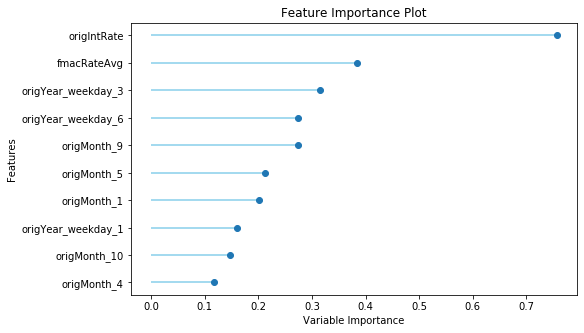

In [17]:
plot_model(lda, plot = 'feature')

In [18]:
egb = create_model('xgboost', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8622,0.7715,0.0263,0.4000,0.0494,0.0331
1,0.8568,0.7514,0.0262,0.2609,0.0476,0.0233
2,0.8669,0.7652,0.0524,0.6667,0.0972,0.0788
3,0.8645,0.7706,0.0132,0.6000,0.0258,0.0200
4,0.8603,0.7549,0.0395,0.3750,0.0714,0.0467
Mean,0.8621,0.7627,0.0315,0.4605,0.0583,0.0404
SD,0.0035,0.0082,0.0134,0.1502,0.0242,0.0213


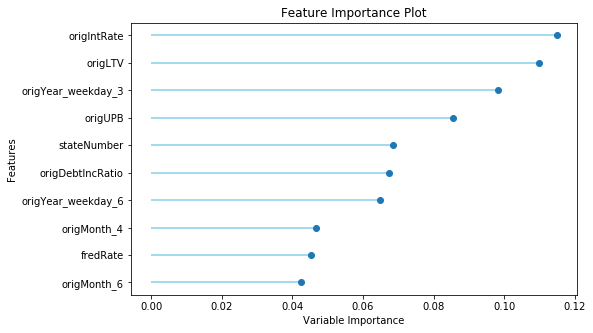

In [19]:
plot_model(egb, plot = 'feature')